## Module 4: Data preprocessing
- In the previous lesson, we discussed about transforming the data from categorical to numerical format, as a part of data preprocessing.
- Here, we will learn about normalizing (or standardizing) the data and then about detecting and treating outliers. These are also the steps in data preprocessing.

### Lesson 3: Understanding data normalization and outlier detection
**Data Normalization:**
- Data normalization refers to the process of bringing various attributes of the dataset into a similar consistent scale.
- Normalization is particularly important when dealing with machine learning algorithms that are sensitive to the scale of input features. 
- By normalizing the data, you ensure that all features have similar scales, which can lead to better model performance and more stable training.
- There are several normalization techniques like **min-max scaling, z-score scaling** etc., which we will discuss in detail in few upcoming lectures.
- The choice of data normalization method depends on the characteristics of our data and the assumptions of the machine learning algorithm that we plan to use. 
- Experiment with different methods and assess their impact on our model's performance to determine the most appropriate normalization technique for our dataset.
- **NOTE** that we usually normalize only the numerical data. Though we convert the categorical data into numerical format through encoding techniques, we do not consider such attributes for normlaization. 

**Why Normalize Data?**
1. Distance-based Algorithms: For algorithms that rely on distances, like K-Means clustering or K-Nearest Neighbors, features with larger scales can dominate the outcome. Imagine trying to measure the distance between two points in a space where one axis represents age (0-100) and the other represents income (in thousands). The income feature would heavily influence the distance calculation.

2. Gradient Descent: Algorithms using gradient descent, such as neural networks or logistic regression, can converge faster when features are on a similar scale.

3. Regularization: In models that use regularization (like Ridge or Lasso regression), normalization ensures that all features contribute equally to the regularization penalty.

### Part 4.3.1  :  Bringing numeric data to the same scale - part I
**Min-Max normalization:**
- We will now discuss one of the important data normalization techniques called min-max normalization.
- Min-Max scaling scales the data to a range between 0 and 1.
- It is calclulated as:

$$ X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}} $$

- Here, $X_{min}$ and $X_{max}$ are the minimum and maximum values of the attribute $X$ in the dataset. 
- Min-Max scaling is suitable for data with known bounds and when you want to preserve the relative relationships between data points.
- Min-Max normalization may not be appropriate for data with outliers, as the presence of outliers can significantly affect the scaling. In such cases, you may consider robust scaling techniques or address outliers separately.



**Implementation:**
- In the previous lesson, we have encoded our POS data, and the only numerical columns to be normalized are *Revenue* and *Units_sold*
- As we know from our previous discussions that there are no outliers in these two columns. 
- So, min-max normalization is a good option to normalize these two columns. 

In [ ]:
# Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [ ]:
#read the encoded data that we have saved in the previous lesson
pos_data = pd.read_csv('POS_EncodedData.csv')
pos_data.head()

In [ ]:
#import the package
from sklearn.preprocessing import MinMaxScaler

#Save numerical columns in a list
cnames = ["Revenue($)", "Units_sold"]
sc = MinMaxScaler()

#saving the scaled data in new columns
for col in cnames:
    pos_data[col+'_Scaled'] = sc.fit_transform(pos_data[col].values.reshape(-1,1))

pos_data.head()

In [ ]:
#look at the statistical features before and after scaling
pos_data[["Revenue($)",  "Revenue($)_Scaled","Units_sold", "Units_sold_Scaled"]].describe()

**Please note that the min-max scaling does not change the shape and the distribution of the data. It will just change the range of values.**

**Look at the graphs given below to demonstrate this.**

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

# Original Data
axes[0].hist(pos_data['Revenue($)'], bins=30, color='blue', alpha=0.7)
axes[0].set_title('Original Data')
axes[0].grid(True)

# Scaled Data
axes[1].hist(pos_data['Revenue($)_Scaled'], bins=30, color='green', alpha=0.7)
axes[1].set_title('Scaled Data')
axes[1].grid(True)

# plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

# Original Data
axes[0].boxplot([pos_data['Units_sold']])
axes[0].set_title('Original Data')
axes[0].grid(True)

# Scaled Data
axes[1].boxplot([pos_data['Units_sold_Scaled']])
axes[1].set_title('Scaled Data')
axes[1].grid(True)

# plt.tight_layout()
plt.show()

***Inference:***
- Histogram and the box plots are the two ways to check the distribution of the data and the positioning of outliers before and after the data scaling.
- From the above two graphs, we can make out that the the scaling has only changed the range of scale of the data, but the distribution of the data is intact. 
- This assures us that scaling will not change the properties of the data, and hence, it will not have any adverse affect on the model building.

### Part 4.3.2  :  Bringing numeric data to the same scale - part II
**Z-score normalization:**
- Z-score normalization, also known as standardization or zero-mean normalization, is a data preprocessing technique used to transform numerical data into a standard normal distribution with a mean (average) of 0 and a standard deviation of 1. 
- This technique scales and centers the data, making it suitable for machine learning algorithms that assume features are normally distributed or have similar scales.
- It is calculated as:

$$ X_{norm} = \frac{X-\mu}{\sigma}$$

- Here, $\mu$ and $\sigma$ are the mean and standard deviation of the attribute $X$.
- Z-score standardization is suitable for data with unknown or varying bounds and when you want to center the data around the mean.
- Note that, Z-score normalization assumes that the data is approximately normally distributed. If the data is significantly skewed or has outliers, we may need to consider alternative normalization or transformation techniques.

**Let us implement the z-scale normalization on the POS data**

In [ ]:
#read the data
pos_data = pd.read_csv('POS_EncodedData.csv')
pos_data.head()

In [ ]:
#look at the statistical features before  scaling
pos_data[["Revenue($)",  "Units_sold"]].describe()

**NOTE:**
- If we need to compare the graphs of the attribute before and after scaling, we may need to save the scaled attribute as a new column.
- However, for all the practical purposes, we will be replacing the existing columns with the scaled columns when we wish to go for model building.
- In the below given example, the original columns are replaced by the scaled columns, and hence the *describe()* function is used to observe the statistical properties before and after the scaling. 

In [ ]:
#import the package
from sklearn.preprocessing import StandardScaler

#Save numerical columns in a list
cnames = ["Revenue($)", "Units_sold"]
sc = StandardScaler()

#saving the scaled data in the same columns
for col in cnames:
    pos_data[col] = sc.fit_transform(pos_data[col].values.reshape(-1,1))

pos_data.head()

In [ ]:
#look at the statistical features after scaling
pos_data[["Revenue($)",  "Units_sold"]].describe()

***Inferences:***
- We can observes that the scale of the data got changed here as well.
- One can plot the histogram and box plot to confirm that there will not be any change in the distribution of the data.

### Part 4.3.3  : Other types of transformations
- The datasets of real wold problems often comes with their unique challenges. 
- At times, the data may exhibit significant skewness. 
- While the usual scaling techniques adjust the range of data values, they may not always address these underlying complexities. - This is where advanced transformations, such as robust scaling, logarithmic & polynomial transformations step in to offer tailored solutions to specific data challenges.

**Robust Scaling:**
- Robust scaling is similar to Min-Max scaling but is less affected by outliers.
- It scales data to a specified range, typically between 0 and 1, using the interquartile range (IQR) instead of the min-max range.
- Robust scaling is useful when your data contains outliers that can distort the scaling.
- In python, we can use **RobustScaler** from **sklearn.preprocessing** to implement robust scaling. 

**Log Transformations:**
- Log transformation applies a logarithmic function to the data, which can help reduce the impact of skewness in the data.
- It is used when data is highly skewed and you want to make it more symmetric.
- Log transformation is commonly applied to positive data with a wide range of values.
- It involves taking the logarithm (typically the natural logarithm, base e) of each data point. 
- The calculation is:

$$ Y = log_{e}X $$

- Here, $X$ is original data and $Y$ is a scaled data.
- Log transformation is particularly useful for the following scenarios:
    - Reducing Skewness: When data is highly skewed (positively or negatively), log transformation can make the distribution more symmetric and closer to a normal distribution. This can be important for statistical analyses and modeling, as many statistical techniques assume normally distributed data.
    - Stabilizing Variance: In some cases, the variance of data points increases with their magnitude. Log transformation can help stabilize the variance, making it more consistent across the data range.
    - Linearizing Relationships: In cases where there is a multiplicative relationship between variables, taking the logarithm can linearize the relationship, making it easier to analyze and model.
- In Python, we use **log** function from **numpy** package to convert a value into its logarithmic format. 
- It's important to note that log transformation is applicable only to data with positive values since the logarithm of zero or negative numbers is undefined. 
- Additionally, when working with log-transformed data, it is common to back-transform the results if necessary to interpret them in the original scale. 
- This involves taking the antilogarithm, which can be done using the exponential function - **numpy.exp()** in Python.

**Other Custom Scaling Techniques:**
- Depending on our data and domain, we may develop custom scaling techniques that suit our specific requirements. 
- We can create a custom scaling function that takes the original data as input and returns the scaled or transformed data. 
- This function can be designed based on our knowledge of the data distribution, characteristics, or specific goals.
- Custom scaling can involve transformations like square root, exponential, or other mathematical functions.
- Custom scaling can be particularly useful in scenarios where our data exhibits unique patterns, nonlinear relationships, or specific domain knowledge that isn't adequately addressed by standard scaling techniques. 
- When using custom scaling, it is essential to document and justify our approach, as it may not be as widely recognized or interpretable as standard scaling methods.

**Let us implement the log transformation on the attributes of Online data, in which few attributes are skewed. We will also observe how log transformation modifies the distribution of the data as well.**

In [ ]:
online_data=pd.read_csv('Online_Data.csv')
online_data.head()

In [ ]:
#check the skewness of the values
print('Skewness of Online_Clicks:',round(online_data['Online_Clicks'].skew(),4))
print('Skewness of Online_Cost:',round(online_data['Online_Cost'].skew(),4))
print('Skewness of Online_Impressions:',round(online_data['Online_Impressions'].skew(),4))

In [ ]:
online_data.describe()

In [ ]:
#import the package
import numpy as np

#Save numerical columns in a list
cnames = ['Online_Clicks', 'Online_Cost','Online_Impressions' ]

#saving the scaled data in the same columns
for col in cnames:
    online_data[col+"_Scaled"] = np.log(online_data[col])

online_data.head()

In [ ]:
#check the skewness of the values after scaling
print('Skewness of Online_Clicks:',round(online_data['Online_Clicks_Scaled'].skew(),4))
print('Skewness of Online_Cost:',round(online_data['Online_Cost_Scaled'].skew(),4))
print('Skewness of Online_Impressions:',round(online_data['Online_Impressions_Scaled'].skew(),4))

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(10, 5))

#create chart in each subplot
sns.histplot(online_data['Online_Clicks'],  kde= True, bins=50, color='blue', ax=axes[0,0])
axes[0,0].set_title('Original Data')
axes[0,0].set(xlabel=None)

sns.histplot(online_data['Online_Clicks_Scaled'], kde= True,bins=50,color='green', ax=axes[0,1])
axes[0,1].set_title('Scaled Data')
axes[0,1].set(xlabel=None)

sns.boxplot(online_data['Online_Clicks'],  color='blue', ax=axes[1,0])
sns.boxplot(online_data['Online_Clicks_Scaled'], color='green', ax=axes[1,1])

plt.show()

***Inference:***
- It is clearly observed from the histograms that the scaled data is more similar to normal distribution than the original data.
- The skewness of the attributes is also reduced. 
- Boxplots shows that the outliers are taken into account and hence the scaled data do not contain any outliers now.

#### Final remarks about data normalization
- Every data scientist will face a tricky question during data normalization: ***Whether all the attributes in the dataset should be scaled using the same technique or can we use different scaling techniques on different attributes?***
- Unfortunately, there is no one-size-fits-all answer for this question. 
- However, few considerations can be:
    - **Homogeneity of Scaling:**
        - When applying machine learning algorithms that are sensitive to the scale of features, it's generally a good practice to scale all numerical attributes using the same technique. 
        - This ensures that all features have a consistent scale, making them directly comparable.
    - **Feature Type:**
        - Numerical features (continuous or discrete) are typically candidates for scaling because they can have widely varying scales. 
        - On the other hand,  categorical features are often not scaled because their values represent categories or labels, and scaling can distort their meaning.
    - **Machine learning algorithm's sensitivity:
        - Some machine learning algorithms are highly sensitive to feature scaling. 
        - For example, support vector machines (SVMs) and k-nearest neighbors (KNN) are sensitive to the scale of features and may perform poorly if the scales are inconsistent. 
        - In such cases, scaling all attributes using the same technique is essential.
    - **Domain Knowledge:**
        - Domain-specific knowledge and the characteristics of your data may dictate different scaling strategies for different subsets of attributes. 
        - For example, in finance, we may have some financial ratios that should not be scaled, while others may benefit from scaling.
    - **Data Distribution:**
        - If our data contains features with different data distributions, we may need to apply different scaling techniques. 
        - For example, we may use Min-Max scaling for one set of features and Z-score standardization for another set.
    - **Dimensionality Reduction Techniques:**
        - If we plan to use dimensionality reduction techniques like Principal Component Analysis (PCA), it's often recommended to scale all numerical attributes to prevent features with larger scales from dominating the results.
        
- In summary, it's important to consider the characteristics of our data and the requirements of the machine learning algorithms. 
- We may need to experiment with different scaling techniques or even apply them selectively to subsets of your features based on their properties and the context of our analysis. 
- It is a best practice to document the data preprocessing steps to maintain transparency and reproducibility.

### Part 4.3.4  : Finding outlying data points
- Outlier detection is the process of identifying data points or observations that significantly deviate from the majority of the data in a dataset. 
- They are the values that are unusually distant from the central tendency of the data, such as the mean or median. 
- Outliers can be caused by various factors:
    - errors in data collection
    - measurement noise
    - the presence of rare events
- Understanding and handling outliers is crucial in data analysis and modeling, as they can have a significant impact on statistical results and machine learning algorithms.
- Outliers can be univariate or multivariate in the dataset. That is, outliers may exist in only one attribute of the dataset or may exist in more than one attributes.

**Methods to detect the outliers:**
- **Visual Methods**:
    - **Box Plots**: As we have seen before, box plots visually show the range of the data, with outliers plotted as individual points outside the whiskers.
    - **Histograms**: A sudden spike or dip in a histogram can indicate outliers.
    - **Scatter Plots**: For bivariate data, scatter plots can help visualize outliers as points that fall far from the main cluster of data.
    
- **Statistical Methods**:
    - **Z-Score**: 
        - We have seen earlier that when data is distributed normally, 99.7% of the data points lie within the range of 3 standard deviations ($\sigma$) from the mean. 
        - So, any datapoint which is greater than $3\sigma$ or lesser than $-3\sigma$ can be considered as an outlier.
    - **IQR (Interquartile Range)**: 
        - Data points that fall below $Q1 - 1.5 \times IQR$ or above $Q3 + 1.5 \times IQR$ are considered as outliers. 


**Let us use online data to visualize the outliers and to list out those records**

In [ ]:
#read the data
online_data = pd.read_csv('Online_Data.csv')
online_data.head()

In [ ]:
#total records
online_data.shape

**Plot the boxplot of all three numerical attributes to identify outliers**

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(14, 3))

sns.boxplot(online_data['Online_Clicks'],  color='blue', ax=axes[0])
sns.boxplot(online_data['Online_Cost'], color='green', ax=axes[1])
sns.boxplot(online_data['Online_Impressions'], color='red', ax=axes[2])

plt.show()

***Explanation:***
- We can observe from the graphs that all three attributes have considerable amount of outliers.
- Now let us find out the count of outliers in each of these attributes.

In [ ]:
#write a function to get the records with outliers 
def get_outliers(col):
    Q1 = online_data[col].quantile(0.25)
    Q3 = online_data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = online_data[(online_data[col] < (Q1 - 1.5 * IQR)) | (online_data[col] > (Q3 + 1.5 * IQR))]
    return outliers    #this will return the dataframe containing outlier records in a specific attribute

In [ ]:
#call the function to get outliers in each of these attributes
#pass the column name to the function

Outliers_OnlineClicks = get_outliers('Online_Clicks')
Outliers_OnlineCost = get_outliers('Online_Cost')
Outliers_OnlineImpressions = get_outliers('Online_Impressions')

print("Number of records with outliers in the attribute Online_Clicks",Outliers_OnlineClicks.shape[0])
print("Number of records with outliers in the attribute Online_Cost",Outliers_OnlineCost.shape[0])
print("Number of records with outliers in the attribute Online_Impressions",Outliers_OnlineImpressions.shape[0])

**NOTE:**
- We can see that the attributes Online_Clicks, Online_Cost and Online_Impressions have 40, 48 and 81 outliers respectively.
- However, we cannot say that there are 169 outlier records (sum of the above numbers) in the dataset, becasue there are chances that same row may contain outlier value in more than one attribute.
- So, let us find out the unique row-indices of these records where outliers are found.
- Here is the logic to do this task:
    - List out the row indices for all the rows containing outliers in the three attributes.
    - Add these list of row indices.
    - Apply ***set()*** on this summed list.
    - ***set()*** is a data structure in Python, which can be used to store values of different data types.
    - However, as we have better data structures like **list()** in python to store the heterogeneous data, sets are rarely used.
    - But, the set() makes sure that there are no duplicate entries in it.
    - Hence, applying set() on a list will remove all the duplicates in that list and returns the unique values.
    - As the result is now a set, we can convert it back to list.

In [ ]:
# get the records with outliers
outlier_records = list(set(list(Outliers_OnlineClicks.index)+ list(Outliers_OnlineCost.index)+ list(Outliers_OnlineImpressions.index)))

#create a dataframe of only these records
outliers_df=online_data.loc[outlier_records]
outliers_df.head()


In [ ]:
print('Total number of outliers in the entire dataset =', outliers_df.shape[0])

In [ ]:
#filter out the records containing outliers
non_outliers_df = online_data.drop(outlier_records,axis=0)
print('Total number of records without outliers in the entire dataset =',non_outliers_df.shape[0])

**Visualize the distribution of the records with and without outliers to observe the significant difference that they make to the data.**

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(14, 3))

sns.kdeplot(data=outliers_df['Online_Clicks'].cumsum(),
            color='crimson', label='Online_Clicks_Outliers', fill=True, ax=axes[0])
sns.kdeplot(data=non_outliers_df['Online_Clicks'].cumsum(),
            color='limegreen', label='Online_Clicks_Normal', fill=True, ax=axes[0])


sns.kdeplot(data=outliers_df['Online_Cost'].cumsum(),
            color='crimson', label='Online_Cost_Outliers', fill=True, ax=axes[1])
sns.kdeplot(data=non_outliers_df['Online_Cost'].cumsum(),
            color='limegreen', label='Online_Cost_Normal', fill=True, ax=axes[1])


sns.kdeplot(data=outliers_df['Online_Impressions'].cumsum(),
            color='crimson', label='Online_Impressions_Outliers', fill=True, ax=axes[2])
sns.kdeplot(data=non_outliers_df['Online_Impressions'].cumsum(),
            color='limegreen', label='Online_Impressions_Normal', fill=True, ax=axes[2])


plt.tight_layout()
plt.show()

***Inference:***
- From the graphs, we can make out that the outlier values are significantly different from the rest of the values in their statistical distribution and the properties.
- We can use *describe()* function also to observe such differences, but visuals give better idea.

### Part 4.3.5  : How to deal with outliers?
- Sometimes, outliers may not be wrong values. For example, an employee dataset may contain a few records with very high values for the salary of an employee, that may be significantly higher from the rest of the values. These records may pertain to the executives and are not wrong values.  However, if the age column contains values like 200 or 500, then obviously it is an error in data entry.
- So, while dealing with the outliers, one must apply domain knowledge and understanding.
- There are several approaches to handle outliers:
    - **Removal:** We can remove outliers from the dataset, but this should be done with caution, because we might be losing information.
    - **Transformation:** We can apply data transformations (e.g., log transformation) to make the data less sensitive to outliers.
    - **Imputation:** For some types of outliers, imputation methods can be used to replace them with more reasonable values. For example, we can replace the outlier values in an attribute with the median value of that attribute.
    - **Capping outliers using IQR ranges:** This is also an alternative technique to imputing the outliers. We can cap the outliers by replacing them with some capped values. The most widely used approach is to cap the outliers at the lower whisker by $Q1 - 1.5*IQR$ and cap the outliers at upper whisker by $Q3 + 1.5*IQR$
    - **Model-Based Approaches:** Some algorithms are robust to outliers. So, we need not worry about existance of outliers in such cases. However, when we are using the models which are highly influenced by outliers, we can build two models - one with the dataset without outliers, and the other model for the records consisting of outliers. Then, we can aggregate the performance of these two models to infer the overall model performance. 
    - **Domain Knowledge:** Understanding the domain and the context of the data can help determine whether an observation is a legitimate outlier or an error.

**Let us implement the imputation technique on online data**

In [87]:
# compute the median value of the attribute having outliers
OnlineClicks_median = online_data['Online_Clicks'].median()
OnlineClicks_median

820.5

In [88]:
# calculate Q1 and Q3
online_data['Online_Clicks'].quantile(0.25), online_data['Online_Clicks'].quantile(0.75)

(604.0, 1097.5)

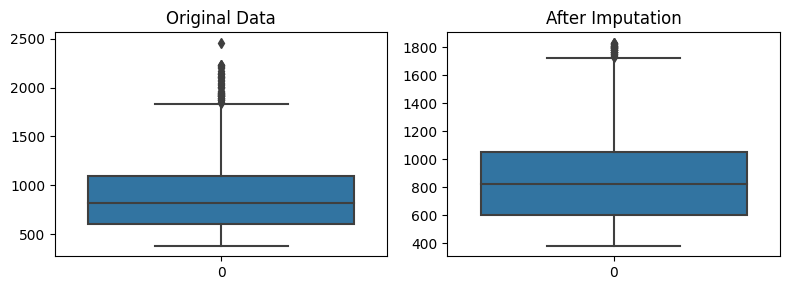

In [89]:
# create a boxplot of Online_Clicks to visualize outliers
fig, axes = plt.subplots(1,2,figsize=(8, 3))
sns.boxplot(data = online_data['Online_Clicks'], ax = axes[0])
axes[0].set_title('Original Data')

# identify the rows containing outliers using IQR
Q1 = online_data['Online_Clicks'].quantile(0.25)
Q3 = online_data['Online_Clicks'].quantile(0.75)
IQR = Q3 - Q1

# the following code returns True or False for each row, based on whether 
# Online_Clicks in that row is an outlier or not
outliers_boolean = (online_data['Online_Clicks'] < (Q1 - 1.5 * IQR)) | (online_data['Online_Clicks'] > (Q3 + 1.5 * IQR))

# replace the outlier values with the median value
online_data['Online_Clicks'] = np.where(outliers_boolean, OnlineClicks_median, online_data['Online_Clicks'])

# draw the boxplot after imputation
sns.boxplot(data = online_data['Online_Clicks'], ax = axes[1])
axes[1].set_title('After Imputation')

plt.tight_layout()
plt.show()

***Inference:***
- From the graphs, we see that the imputation has had a lot of impact on the data.
- However, even after imputation, there are a few outliers. This is because when we replace the outlier values at the upper end with the median of the original data, the value of Q3 will change significantly and so the upper whisker will also change. 
- However, clearly there are fewer outliers than before.

**Removing the records with outliers:**
- As discussed before, we can remove the records containing outliers values.
- However, we have to make sure that the removal does not affect the performance of the further model building process.
- To remove the outlier data, we just need to drop those rows containing outliers - we created the dataframe *non_outliers_df* earlier

#### Capping the outliers using IQR Range

In [90]:
#read the data
online_data = pd.read_csv('Online_Data.csv')
online_data.head()

,SKU ID,Date,Online_Clicks,Online_Cost,Online_Impressions
0,SKU1029,05-01-21,474,1678.909243,53917
1,SKU1054,05-08-21,1093,7198.857206,178173
2,SKU1056,11-05-22,1041,5606.850110,224078
3,SKU1019,3/20/2021,965,4189.187114,191202
4,SKU1021,04-09-22,860,2890.776596,212875


In [91]:
# compute the IQR
Q1 = online_data['Online_Clicks'].quantile(0.25)
Q3 = online_data['Online_Clicks'].quantile(0.75)
IQR = Q3 - Q1

**Logic to clip the values:**
- If a value is greater than $Q3 + 1.5 * IQR$, then replace that value with $Q3 + 1.5 * IQR$.
- If a value is lesser than $Q1 - 1.5 * IQR$, then replace that value with $Q1 - 1.5 * IQR$.

In [92]:
# clip using this logic
online_data['Online_Clicks'] = np.where(online_data["Online_Clicks"]> (Q3 + 1.5 * IQR), (Q3 + 1.5 * IQR),
                        np.where(online_data["Online_Clicks"]< (Q1 - 1.5 * IQR), (Q1 - 1.5 * IQR),
                          online_data['Online_Clicks']))

<Axes: >

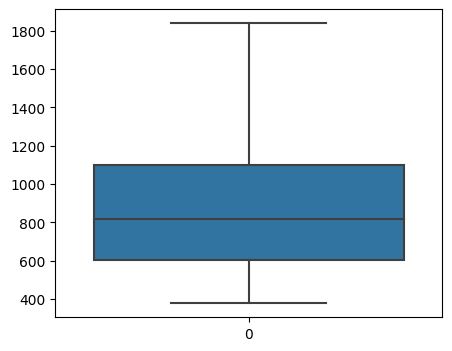

In [93]:
#check for the outliers now
plt.figure(figsize=(5,4))
sns.boxplot(data=online_data['Online_Clicks'])

***Inferences:***
- We can see that there are no more outliers in the column *Online_Clicks*
- Observe the y-axis value range only upto 1800, unlike the earlier 2500. 